<a href="https://colab.research.google.com/github/doheeeeekim/Undergraduate_IndustrialDS/blob/main/%EC%82%B0%EC%97%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_4%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4주차 과제
>[과제1] SepalLengthCm에 대한 종간 Box plot을 그리고 t-test를 통해 분석을 수행하시오

>>t-test 수행 결과 및 전체 box plot 그림 함께 제출

>[과제2] 각 종에 SepalLengthCm과 SepalWidthCm 각 종별로 구분하고 산점도를 그리시오

>>matplotlib를 이용하여 산점도를 그리시오

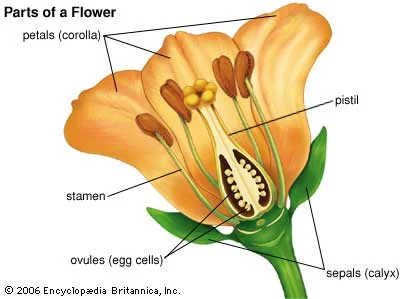

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

In [ ]:
iris = pd.read_csv('datasets_19_420_Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
species = list(iris['Species'].value_counts().index)
print(species)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [ ]:
setosa = iris.loc[iris['Species']=='Iris-setosa',:]
versicolor = iris.loc[iris['Species']=='Iris-versicolor',:]
virginica = iris.loc[iris['Species']=='Iris-virginica',:]

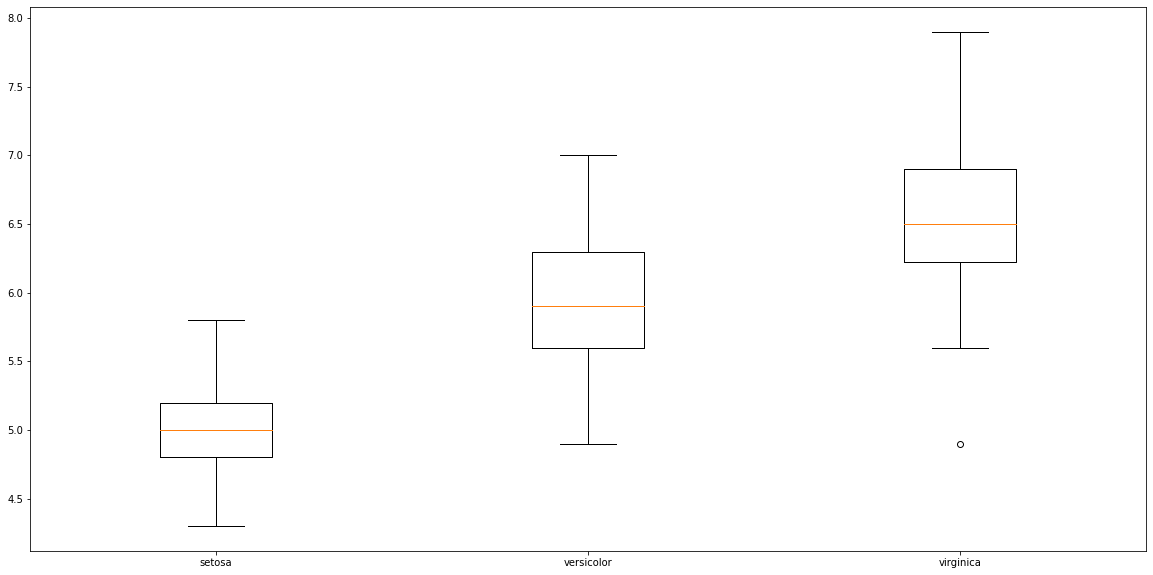

In [ ]:
fig = plt.figure(figsize =(20, 10)) 
ax = fig.add_subplot(111)
bp = plt.boxplot([setosa['SepalLengthCm'],versicolor['SepalLengthCm'],virginica['SepalLengthCm']])
ax.set_xticklabels(['setosa','versicolor','virginica'])
plt.show()

In [ ]:

data = []
for species_value in species:
  data.append(iris.loc[iris['Species']==species_value,'SepalLengthCm'])

print(data)

[0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: SepalLengthCm, dtype: float64, 50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96

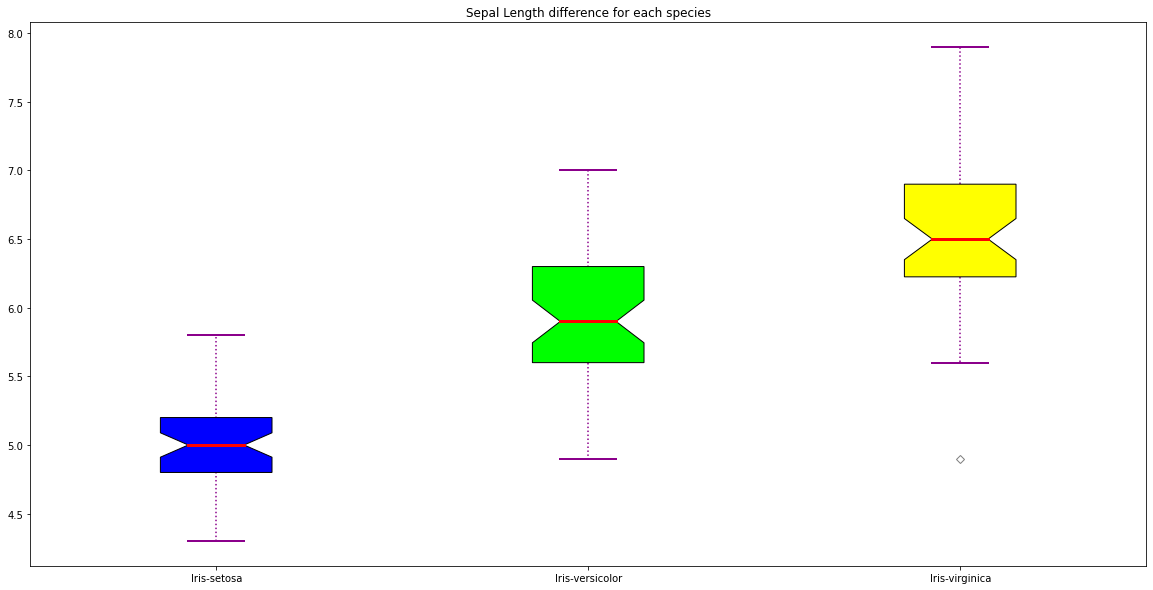

In [ ]:
fig = plt.figure(figsize =(20, 10)) 
ax = fig.add_subplot(111) 
  
# Creating axes instance 
bp = ax.boxplot(data, patch_artist = True, 
                notch ='True', vert = 1) 
  
colors = ['#0000FF', '#00FF00',  
          '#FFFF00', '#FF00FF'] 
  

for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color) 
  
# changing color and linewidth of 
# whiskers 
for whisker in bp['whiskers']: 
    whisker.set(color ='#8B008B', 
                linewidth = 1.5, 
                linestyle =":") 
  
# changing color and linewidth of 
# caps 
for cap in bp['caps']: 
    cap.set(color ='#8B008B', 
            linewidth = 2) 
  
# changing color and linewidth of 
# medians 
for median in bp['medians']: 
    median.set(color ='red', 
               linewidth = 3) 
  
# changing style of fliers 
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
      
# x-axis labels 
ax.set_xticklabels([species[0], species[1],species[2]])

# Adding title  

plt.title("Sepal Length difference for each species")
#plt.title("Petal length difference for each species", fontsize=30)

  
# Removing top axes and right axes 
# ticks 
ax.get_xaxis().tick_bottom() 
ax.get_yaxis().tick_left() 

'''      
from matplotlib import rcParams
labelsize = 15
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 
'''  
# show plot 
plt.show(bp) 

In [ ]:
import scipy
import scipy.stats as st

In [ ]:
print(species)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [ ]:
statistic, p_value = scipy.stats.ttest_ind(versicolor['SepalLengthCm'],setosa['SepalLengthCm'])
diff = versicolor['SepalLengthCm'].mean() - setosa['SepalLengthCm'].mean()
print('<Versicolor와 Setosa의 꽃받침길이 t-test>')
print('통계량: {}'.format(statistic))
print('P value: {}'.format(p_value))
print('평균 차이: {}'.format(diff))
print('해석: Versicolor와 Setosa의 꽃받침 길이의 평균 차이는 통계적으로 유의하며, Versicolor의 꽃받침 길이의 평균이 {:.2f}만큼 더 크다.'.format(diff))

<Versicolor와 Setosa의 꽃받침길이 t-test>
통계량: 10.52098626754911
P value: 8.985235037487079e-18
평균 차이: 0.9299999999999997
해석: Versicolor와 Setosa의 꽃받침 길이의 평균 차이는 통계적으로 유의하며, Versicolor의 꽃받침 길이의 평균이 0.93만큼 더 크다.


In [ ]:
statistic, p_value = scipy.stats.ttest_ind(virginica['SepalLengthCm'],versicolor['SepalLengthCm'])
diff = virginica['SepalLengthCm'].mean() - versicolor['SepalLengthCm'].mean()
print('<Virginica와 Versicolor의 꽃받침길이 t-test>')
print('통계량: {}'.format(statistic))
print('P value: {}'.format(p_value))
print('평균 차이: {}'.format(diff))
print('해석:Virginica와 Versicolor의 꽃받침 길이의 평균 차이는 통계적으로 유의하며, Virginica의 꽃받침 길이의 평균이 {:.2f}만큼 더 크다.'.format(diff))

<Virginica와 Versicolor의 꽃받침길이 t-test>
통계량: 5.629165259719801
P value: 1.7248563024547942e-07
평균 차이: 0.6519999999999984
해석:Virginica와 Versicolor의 꽃받침 길이의 평균 차이는 통계적으로 유의하며, Virginica의 꽃받침 길이의 평균이 0.65만큼 더 크다.


In [ ]:
statistic, p_value = scipy.stats.ttest_ind(virginica['SepalLengthCm'],setosa['SepalLengthCm'])
diff = virginica['SepalLengthCm'].mean() - setosa['SepalLengthCm'].mean()
print('<Virginica와 Setosa의 꽃받침길이 t-test>')
print('통계량: {}'.format(statistic))
print('P value: {}'.format(p_value))
print('평균 차이: {}'.format(diff))
print('해석:Virginica와 Setosa의 꽃받침 길이의 평균 차이는 통계적으로 유의하며, Virginica의 꽃받침 길이의 평균이 {:.2f}만큼 더 크다.'.format(diff))

<Virginica와 Setosa의 꽃받침길이 t-test>
통계량: 15.386195820079404
P value: 6.892546060674059e-28
평균 차이: 1.581999999999998
해석:Virginica와 Setosa의 꽃받침 길이의 평균 차이는 통계적으로 유의하며, Virginica의 꽃받침 길이의 평균이 1.58만큼 더 크다.


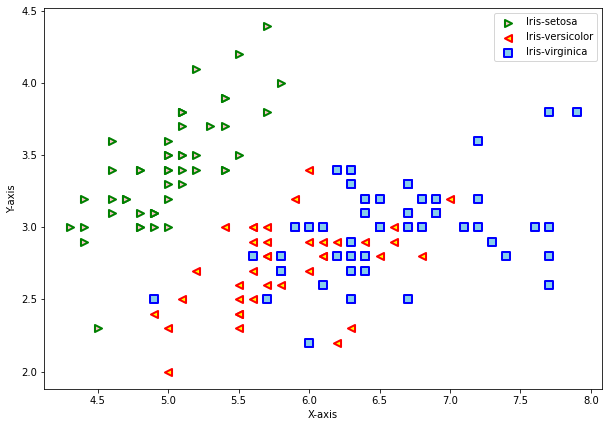

In [ ]:
data = []
labels = []
for species_value in species:
  data.append(iris.loc[iris['Species']==species_value,['SepalLengthCm','SepalWidthCm']])
  labels.append(species_value)


fig = plt.figure(figsize =(10, 7)) 
plt.scatter(data[0]['SepalLengthCm'], data[0]['SepalWidthCm'], c ="pink",  
            linewidths = 2,  
            marker =">",  
            edgecolor ="green",  
            s = 50) 
  
plt.scatter(data[1]['SepalLengthCm'], data[1]['SepalWidthCm'], c ="yellow", 
            linewidths = 2, 
            marker ="<",  
            edgecolor ="red",  
            s = 50) 

plt.scatter(data[2]['SepalLengthCm'], data[2]['SepalWidthCm'], c ="skyblue", 
            linewidths = 2, 
            marker ="s",  
            edgecolor ="blue",  
            s = 50) 

plt.xlabel("X-axis") 
plt.ylabel("Y-axis") 
plt.legend(labels)
plt.show() 